# ¿Cómo se usan las distintas descomposiciones vistas en clase?

La idea de este notebook es mostrar para qué se usan las distintas descomposiciones, y como se implementa facilmente en Python usando Numpy. Ademas, se muestran ejemplos de implementacion de eliminacion gaussiana y descomposicion LU pero no es lo central. \
Primero se utiliza eliminación gaussiana y descomposición LU para resolver un sistema de ecuaciones lineales y después se ven las distintas estrategias que se pueden seguir para realizar un ajuste mediante cuadrados mínimos.
_______________

## 1era parte: Resolución de un sistema de ecuaciones lineales con diversos métodos

### Guia 2: Ejercicio 2
\begin{align}
    5x_1 + 2x_2 - 1x_3 &= 4 \\
    1x_1 - 5x_2 - 2x_3 &= 4 \\
    1x_1 - 1x_2 + 3x_3 &= 4
\end{align}
Solución: 
\begin{align}
    x_1 &= \frac{124}{99} \\
    x_2 &= \frac{-80}{99} \\
    x_3 &= \frac{64}{99}
\end{align}
________________

In [1]:
""" Definicion del problema y solucion directa usando linalg.solve """

import numpy as np
from copy import copy

A = np.asarray([[5.0, 2.0, -1.0], [1.0, -5.0, -2.0], [1.0, -1.0, 3.0]], dtype=np.float32)
b = np.asarray([4, 4, 4], dtype=np.float32)

# Solucion sin hacer nada
solution = np.linalg.solve(A, b)
print(solution)

[ 1.2525252  -0.8080808   0.64646465]


In [2]:
""" Eliminación Gaussiana """

def gaussian_elimination(A, b):
    U = copy(A)
    newb = copy(b)
    
    print(f'Inicio:\n{U}')  # comentar si no se quiere ver cada paso de la eliminacion 
    # k: numero de paso de la eliminacion
    for k in range(len(U)):    
        # j: fila que se esta eliminando
        for j in range(k+1, len(U)):
            m = U[j][k]/U[k][k]
            U[j] = U[j] - m*U[k]
            newb[j] = newb[j] - m*newb[k]
        print(f'Paso {k + 1}:\n{U}') # comentar si no se quiere ver cada paso de la eliminacion 
    return (U, newb)

U_gaussian, b_gaussian = gaussian_elimination(A, b)
x_gaussian = np.linalg.solve(U_gaussian, b_gaussian)
print(f'Solucion mediante eliminacion gaussiana: {x_gaussian}')

Inicio:
[[ 5.  2. -1.]
 [ 1. -5. -2.]
 [ 1. -1.  3.]]
Paso 1:
[[ 5.   2.  -1. ]
 [ 0.  -5.4 -1.8]
 [ 0.  -1.4  3.2]]
Paso 2:
[[ 5.         2.        -1.       ]
 [ 0.        -5.4       -1.8      ]
 [ 0.         0.         3.6666667]]
Paso 3:
[[ 5.         2.        -1.       ]
 [ 0.        -5.4       -1.8      ]
 [ 0.         0.         3.6666667]]
Solucion mediante eliminacion gaussiana: [ 1.2525252  -0.8080808   0.64646465]


____________
Para resolver un sistema utilizando descomposición LU notar que:
\begin{align}
    A \vec{x} &= \vec{b} \\
    L U \vec{x} &= \vec{b}
\end{align}
Entonces debemos resolver:
\begin{align}
    L \vec{y} &= \vec{b} \\
    U \vec{x} &= \vec{y}
\end{align}

In [3]:
""" Descomposicion LU """

import scipy.linalg

# Codigo de ejemplo de como se descompone LU si se quiere ver el paso a paso
# Recomiendo usar version de Python porque esta tiene bastante error numerico
def lu_decomposition(A):
    """(I | A) -> (L | A)"""
    U = copy(A)
    L = np.eye(len(A))
    print(f'Inicio:\nL:\n{L}\nU:\n{U}')  # comentar si no se quiere ver cada paso de la descomposicion 
    # k: numero de paso de la descomposicion
    for k in range(len(U)):    
        # j: fila que se esta eliminando
        for j in range(k+1, len(U)):
            m = U[j][k]/U[k][k]
            U[j] = U[j] - m*U[k]
            L[j][k] = m
        print(f'Paso {k + 1}:\nL:\n{L}\nU:\n{U}') # comentar si no se quiere ver cada paso de la descomposicion 
    return (L, U)

L, U = lu_decomposition(A)
# print(L @ U)
#p, L, U = scipy.linalg.lu(A)
y = np.linalg.solve(L, b)
x_lu = np.linalg.solve(U, y)
print(f'Solucion mediante descomposicion LU: {x_lu}')

Inicio:
L:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
U:
[[ 5.  2. -1.]
 [ 1. -5. -2.]
 [ 1. -1.  3.]]
Paso 1:
L:
[[1.  0.  0. ]
 [0.2 1.  0. ]
 [0.2 0.  1. ]]
U:
[[ 5.   2.  -1. ]
 [ 0.  -5.4 -1.8]
 [ 0.  -1.4  3.2]]
Paso 2:
L:
[[1.         0.         0.        ]
 [0.2        1.         0.        ]
 [0.2        0.25925925 1.        ]]
U:
[[ 5.         2.        -1.       ]
 [ 0.        -5.4       -1.8      ]
 [ 0.         0.         3.6666667]]
Paso 3:
L:
[[1.         0.         0.        ]
 [0.2        1.         0.        ]
 [0.2        0.25925925 1.        ]]
U:
[[ 5.         2.        -1.       ]
 [ 0.        -5.4       -1.8      ]
 [ 0.         0.         3.6666667]]
Solucion mediante descomposicion LU: [ 1.25252524 -0.80808078  0.64646463]


______________________

## 2da parte: Cuadrados mínimos con diversos métodos


### Guia 2: Ejercicio 9
Ajustar el siguiente conjunto de puntos:

| x |   y  |
|:-:|:----:|
| 1 |  3.1 |
| 2 |  8.8 |
| 3 | 20.2 |

A la siguiente ecuación: $y = ax^2 + b$

Planteo del problema de cuadrados mínimos: \
\begin{equation}
A = \begin{pmatrix}
 1&1 \\ 
 4&1 \\ 
 9&1 
\end{pmatrix}
\,\,\,\,\,\,\,
b = \begin{pmatrix}
 3.1 \\ 
 8.8 \\ 
 20.2 
\end{pmatrix} 
\,\,\,\,\,\,\,
x = \begin{pmatrix}
 a \\ 
 b  
\end{pmatrix}
\end{equation}
Buscamos minimizar el valor de $\left \| A \vec{x} - \vec{b} \right \|^2_2$, para lo cual utilizamos las siguientes estrategias:
1. Resolver el sistema de ecuaciones normales: $ A^TA \vec{x} = A^T\vec{b}$
2. Descomposición QR
3. Descomposicion en valores singulares
___________________________

Solución: a = 2.1520409243447443 b = 0.6571426391601561


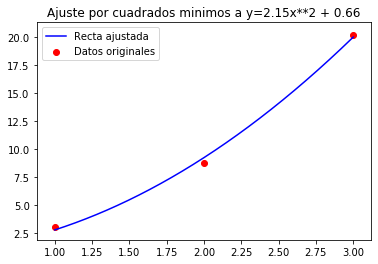

In [4]:
import matplotlib.pyplot as plt

""" Planteo del problema de cuadrados mínimos """

# Parto de los datos de la tabla
data_x = np.asarray([1, 2, 3], dtype=np.float32)
data_y = [3.1, 8.8, 20.2]

# Creo la traspuesta de A a partir de los datos
atransp = [data_x**2, np.full(len(data_x),1)]

A = np.transpose(atransp)
b = np.asarray(data_y, dtype=np.float32)

""" Solución by Python """

a_sol, b_sol = np.linalg.lstsq(A, b, rcond=None)[0]
print(f'Solución: a = {a_sol} b = {b_sol}')

time = np.linspace(data_x[0], data_x[-1], 1000)
adjust = [a_sol*t**2 + b_sol for t in time]
plt.figure()
plt.plot(time, adjust, label='Recta ajustada', color='b')
plt.scatter(data_x, data_y, marker='o', color='r', label='Datos originales')
plt.title(f'Ajuste por cuadrados minimos a y={a_sol:.2f}x**2 + {b_sol:.2f}')
plt.legend()
plt.show()

________________

### 1. Resolución por ecuaciones normales

El sistema de ecuaciones normales surge de igualar a 0 el gradiente de $f(\vec{x}) = \left \| A \vec{x} - \vec{b} \right \|^2_2$. \
Se debe resolver el sistema de ecuaciones lineales:  $ A^TA \vec{x} = A^T\vec{b}$. \
Para resolverlo se puede utilizar cualquiera de los métodos estudiados, sin embargo los más convenientes son Cholesky y eliminación gaussiana. Notar que la matriz $A^TA$ es simétrica por lo que se puede usar la descomposición Cholesky. Dado que se puede usar Cholesky, no se suele utilizar la descomposición LU que es más lenta y realiza la misma tarea que Cholesky, convertir el sistema en dos sistemas triangulares. \
Para resolver un sistema lineal usando Cholesky, se procede de manera similar a la resolución vista para la descomposición LU:
\begin{align}
    A^TA \vec{x} &= A^T\vec{b} \\
    G G^T \vec{x} &= A^T\vec{b}
\end{align}
Debemos resolver:
\begin{align}
    G \vec{y} &= A^T\vec{b} \\
    G^T \vec{x} &= \vec{y}
\end{align}

Para este ejemplo se resuelve utilizando la descomposición Cholesky provista por Numpy.

In [5]:
G = np.linalg.cholesky(A.T @ A)
y = np.linalg.solve(G, A.T @ b)
x_cholesky = np.linalg.solve(G.T, y)

print(f'Solucion resolviendo las ecuaciones normales con Cholesky: {x_cholesky}')

Solucion resolviendo las ecuaciones normales con Cholesky: [2.15204092 0.65714264]


______________

### 2. Resolución por descomposicion QR
Se debe resolver: 
\begin{equation}
    R_1 \vec{x} = Q_1^T \vec{b}
\end{equation}
Se utiliza la descomposición QR de Numpy.

In [6]:
Q, R = np.linalg.qr(A, mode='reduced')
x_qr = np.linalg.solve(R, Q.T @ b)

print(f'Solucion utilizando descomposicion QR: {x_qr}')

Solucion utilizando descomposicion QR: [2.15204092 0.65714264]


______________

### 3.1. Resolución por DSV
La solución se obtiene mediante: 
\begin{equation}
    \vec{x} = \sum_{i = 1}^{r} \frac{\vec{u_i}^T \cdot \vec{b}}{\sigma_i} \vec{v_i}
\end{equation}
Se utiliza la DSV de Numpy.

In [7]:
U, s, Vt = np.linalg.svd(A, full_matrices=True)

x_dsv = np.zeros(len(s))
for k in range(len(s)):
    x_dsv += np.dot(U.T[k],b)/s[k] * Vt[k] 
print(f'Solucion utilizando DSV: {x_dsv}')

Solucion utilizando DSV: [2.15204092 0.65714264]


______________

### 3.2. Resolución alternativa por DSV

Se puede obtener una expresión mas compacta si se utiliza la matriz pseudo-inversa:

\begin{align}
    \Sigma^\dagger &= diag(1/\sigma_1, ..., 1/\sigma_r, 0, ..., 0) \\
    A^\dagger &= V \cdot \Sigma^\dagger \cdot U^T
\end{align}

La solución se obtiene mediante: 
\begin{equation}
    \vec{x} = A^\dagger \vec{b}
\end{equation}

In [8]:
sigma_dagger = np.zeros(A.T.shape)
np.fill_diagonal(sigma_dagger, 1/s)

A_dagger = Vt.T @ sigma_dagger @ U.T
x_pinv = A_dagger @ b

print(f'Solucion con pseudo inversa: {x_pinv}')

Solucion con pseudo inversa: [2.15204092 0.65714264]
